---
The CIFAR-10 and CIFAR-100 datasets are labeled subsets of the 80 million tiny images dataset. CIFAR-10 and CIFAR-100 were created by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

---
# **The CIFAR-10 Dataset**
- CIFAR : Canadian Institute For Advance Research
- The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

- The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

- The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

- Here are the classes in the dataset, as well as 10 random images from each:
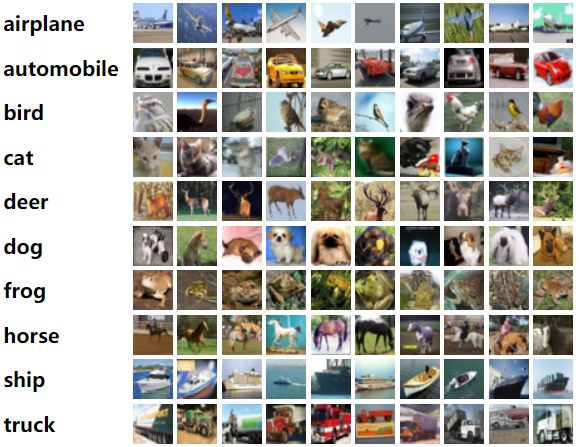

---
## **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
"""
datasets : CIFAR-10 and CIFAR-100
models   : helps build Sequential or functional models
layers   : provides Conv2D, MaxPooling@d, Flatten, Dense, etc.
"""

'\ndatasets : CIFAR-10 and CIFAR-100\nmodels   : helps build Sequential or functional models\nlayers   : provides Conv2D, MaxPooling@d, Flatten, Dense, etc.\n'

---
## **Download and Prepare the Dataset**

In [2]:
print("""
There are 50,000 images in training dataset
10,000 images in test dataset
and there are 10 classes
so, the number os images in each class in training set are : 50000/10 = 5000
and the number of images in each class in test set are : 10000/10 = 1000
i.e. both training and test set are balanced datasets
""")


There are 50,000 images in training dataset 
10,000 images in test dataset 
and there are 10 classes
so, the number os images in each class in training set are : 50000/10 = 5000
and the number of images in each class in test set are : 10000/10 = 1000
i.e. both training and test set are balanced datasets



In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [4]:
train_images

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
train_images.shape

(50000, 32, 32, 3)

as you can see the shape is 4D, i.e. 4 dimensional image.

Each class has 6000 images and each image has 3 components that are "Red Channel Image", "Green Channel Image", "Blue Channel Image", thus it creates a 4d structure

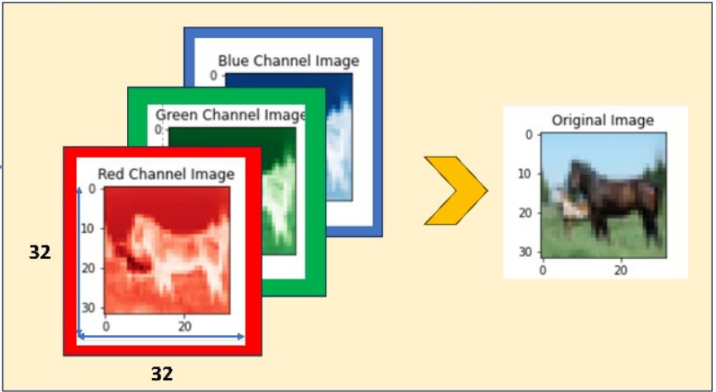

In [6]:
train_labels.shape

(50000, 1)

In [7]:
train_images.ndim

4

In [8]:
train_images[0].shape
# checking image by position so class not considered in dimension
# 32 height, 32 width, 3 channels (R,G,B)

(32, 32, 3)

In [9]:
"""
Select one image random;y from the training set and extract R,G,B channels
"""
image = train_images[12]

R = image[:, :, 0] # it will extract Red Channel from the image
G = image[:, :, 1] # it will extract Green Channel from the image
B = image[:, :, 2] # it will extract Blue Channel from the image

In [10]:
R.ndim, G.ndim, B.ndim
# since there is only one channel the image will we 2D

(2, 2, 2)

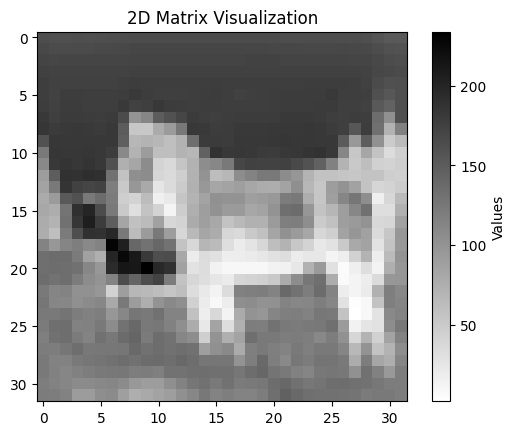

In [11]:
"""
Visualize the 2D matric as a heatmap
"""
plt.imshow(R, cmap="binary")
plt.colorbar(label = "Values")
plt.title("2D Matrix Visualization")
plt.show()

-- Observation: Looks like a horse in the form of 32*32 pixels

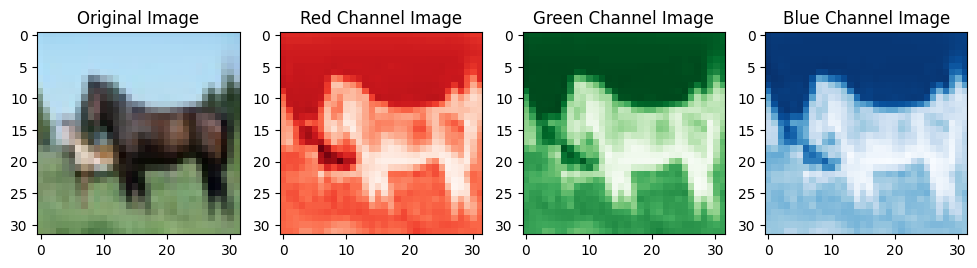

In [12]:
"""
Display the original image along with the RGB channels
"""

# Original Image
fig, ax = plt.subplots(nrows = 1, ncols=4, figsize=(12, 4))
ax[0].imshow(image)
ax[0].set_title("Original Image")

# Red Channel
ax[1].imshow(R, cmap="Reds")
ax[1].set_title("Red Channel Image")

# Green Channel
ax[2].imshow(G, cmap="Greens")
ax[2].set_title("Green Channel Image")

# Blue Channel
ax[3].imshow(B, cmap="Blues")
ax[3].set_title("Blue Channel Image")

plt.show()

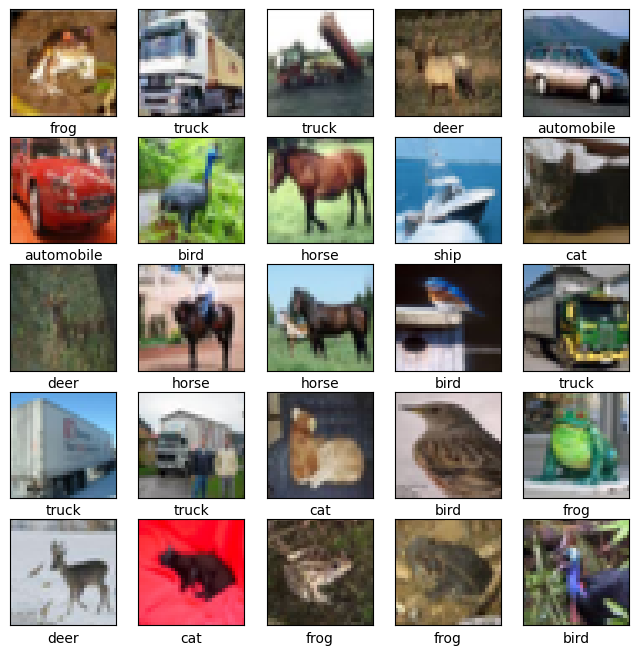

In [13]:
"""
Lets plot first 25 images from the training set
and display the class names below the each image
"""

# class names in the same sequence as mentioned by the dataset above
class_names = ['airplane', 'automobile', 'bird','cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

---
# **Model Building**

#### Let us create the `Convolutional Base` for the model

- `Conv1D` is used for the text

- **`Conv2D` is used for the images**

- `Conv3D` 3D is used for imaging, video processing

### Parameters of the `Conv2D` layers

*   `filters` - value of the filters show that `number of filters` from which CNN model and the Convolutional layer will learn from
*   `kernel-size` - a filter which will move through the image and extract the features of the part using a `dot` product. It basically means the dimension of the filter aka kernel which is `height` X `width`

- Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [14]:
# model object -> created as a placeholder and initializes the Sequential model object
model = models.Sequential()

In [15]:
model

<Sequential name=sequential, built=False>

## **Creating CNN Layer**

In [16]:
"""
FIRST CONVOLUTION + POOLING LAYER

1. Added a 2D convolutional layer with 32 filters, each having filter size 3X3
        no. of filters = 32
        kernal size = (3,3)
        imput shape = Height x Width x No. of Channels = (32,32,3)
2. Adds a max pooling layer having pool size of 2 by 2 grid --> to reduce the spatial dimension by half
"""
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))

"""
SECOND CONVOLUTION + POOLING LAYER

1. Added a 2D convolutional layer with 64 filters, each having filter size 3X3
2. Adds a max pooling layer having pool size of 2 by 2 grid
"""
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

"""
THIRD CONVOLUTION (JUST FILTERING)

1. Added a 2D convolutional layer with 64 filters, each having filter size 3X3
"""
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

## **Adding ANN Layer on top of the CNN Layer**

In [24]:
"""
ANN LAYER

1. Convert a multi-dimensional input coming from convolutional layer into a 1D vector
2. A layer with 64 neurons and applying ReLU activation function
3. Final fully connected layer with 10 neurons as its the output layer to predict 10 classes or categories
"""

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

**NOTE:** - Even a `simple and shallow CNN model architecture` for `CIFAR-10` dataset needs to go through training of `122,770` (~**123K**) parameters

---
Lets visualize the input-ouput relationship as a flow diagram

---

In [27]:
# !pip install pydot
# !pip install graphviz

In [28]:
import pydot
import graphviz
from tensorflow.keras.utils import plot_model

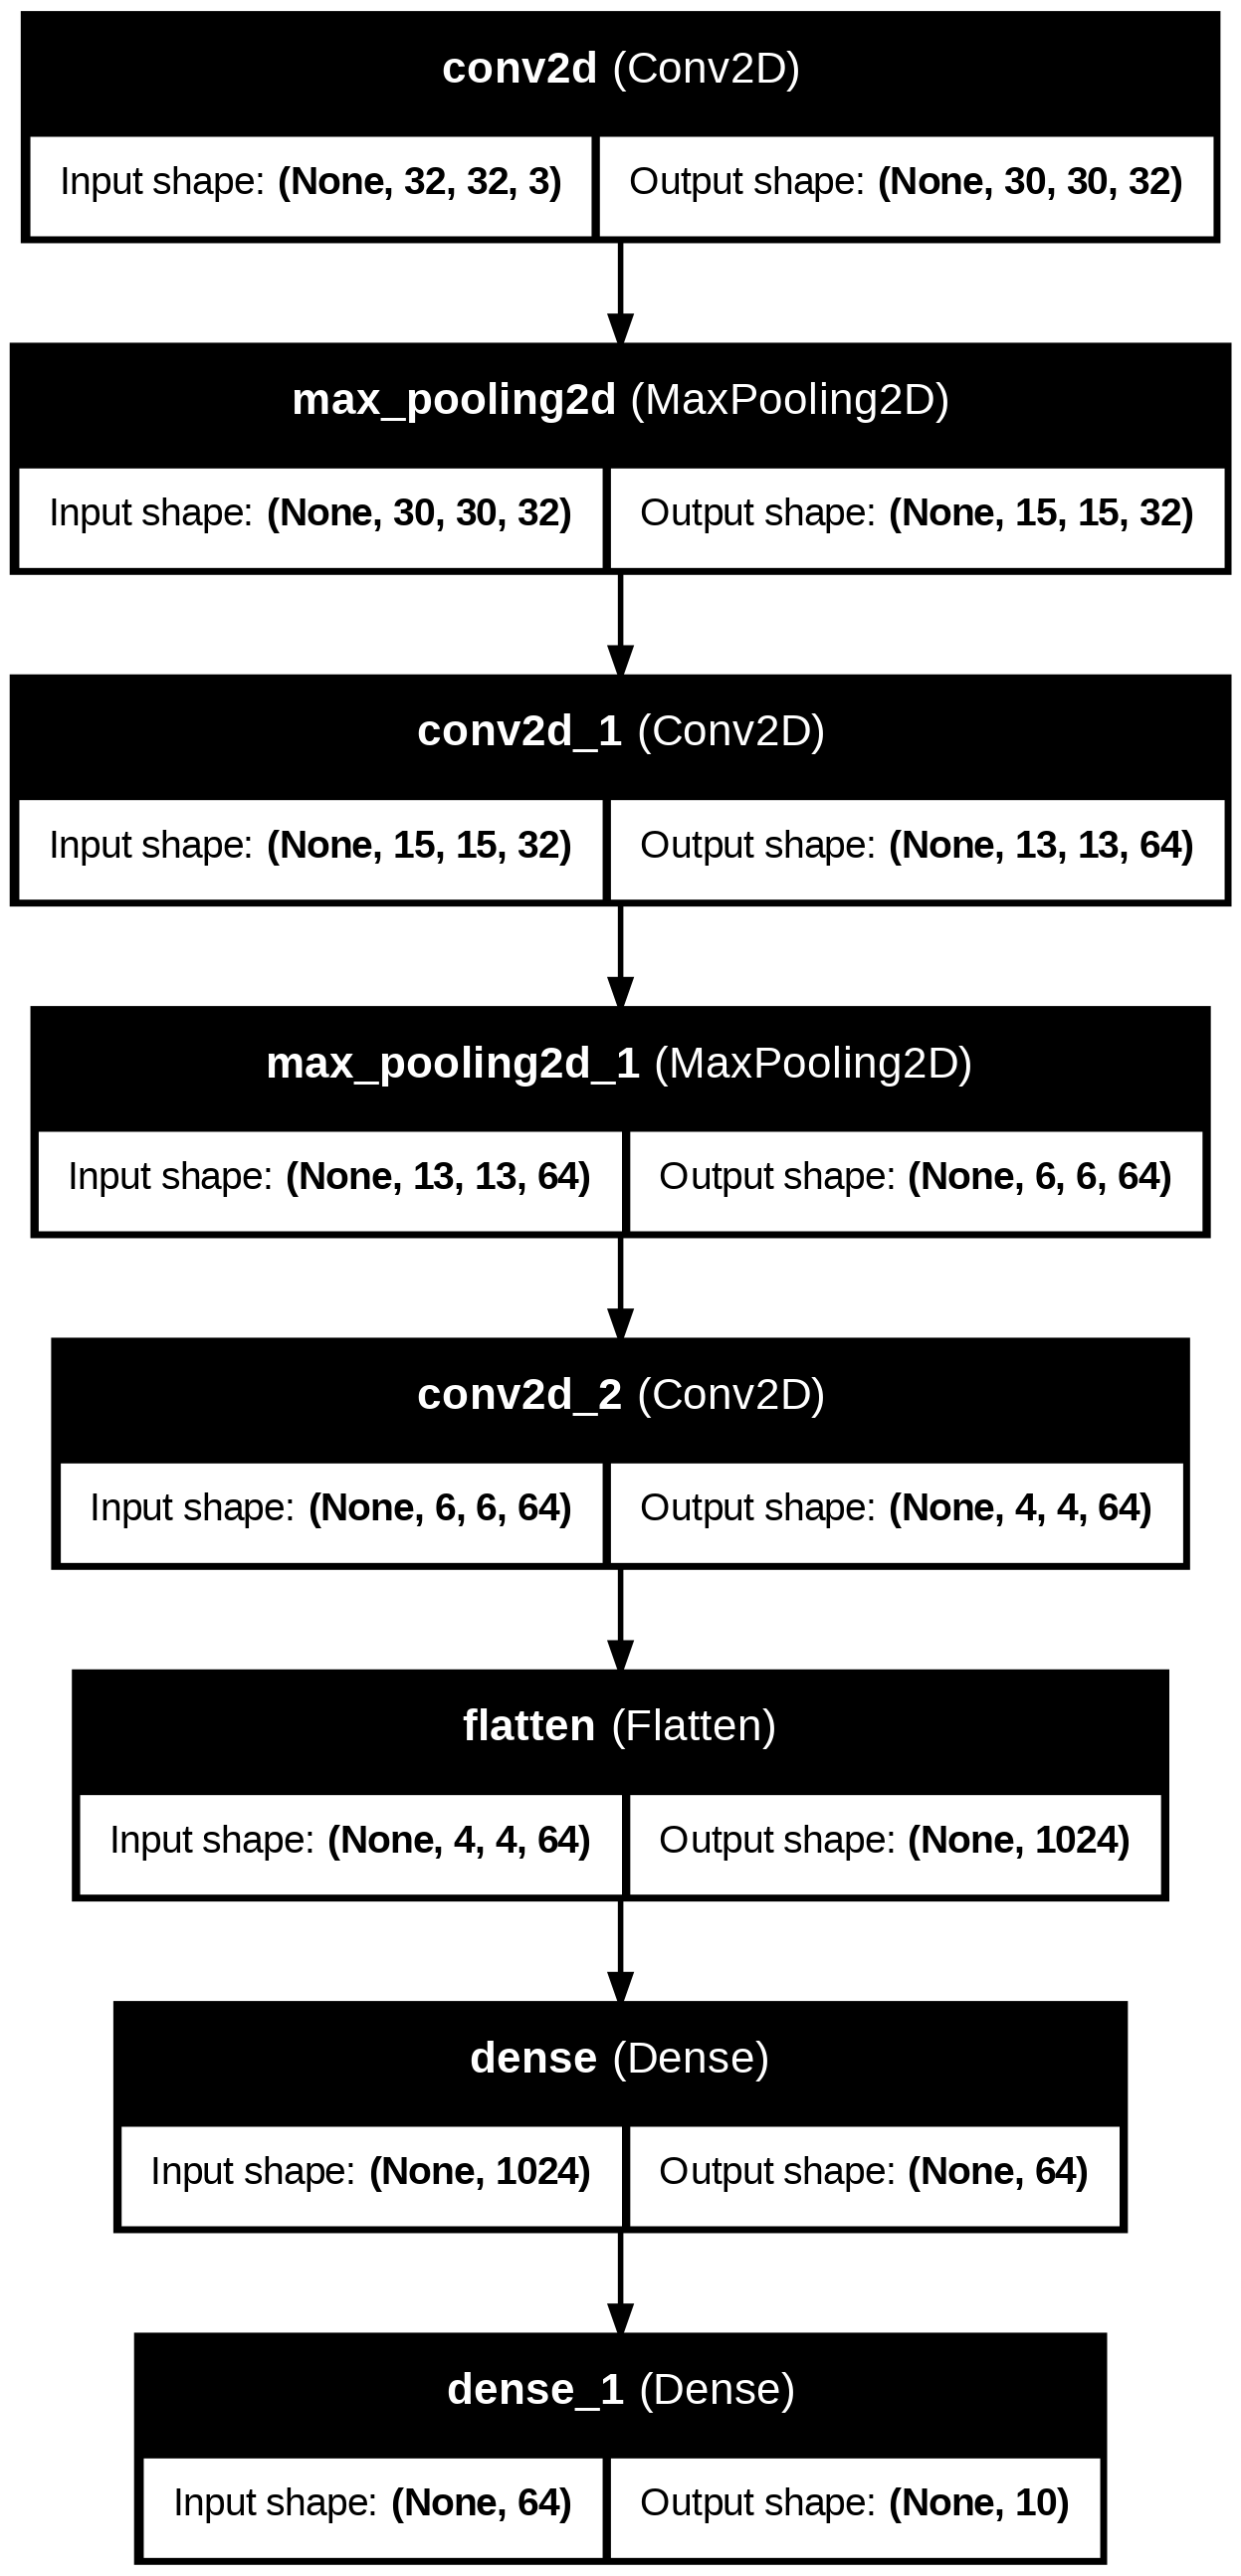

In [32]:
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True
    )

# **Model Compiling and Training**

In [33]:
### Compile and train the model
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ['accuracy'])

In [34]:
history = model.fit(train_images, train_labels, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 43ms/step - accuracy: 0.1023 - loss: 2.5997 - val_accuracy: 0.1006 - val_loss: 2.3030
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.1000 - loss: 2.3018 - val_accuracy: 0.1090 - val_loss: 2.2951
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.2142 - loss: 2.0770 - val_accuracy: 0.4305 - val_loss: 1.5706
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.4939 - loss: 1.4141 - val_accuracy: 0.5488 - val_loss: 1.2854
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.5653 - loss: 1.2222 - val_accuracy: 0.5589 - val_loss: 1.2726
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 46ms/step - accuracy: 0.6154 - loss: 1.0964 - val_accuracy: 0.5962 - val_loss: 1.1769
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 43ms/step - accuracy: 0.6487 - loss: 0.9925 - val_accuracy: 0.5919 - val_loss: 1.2143
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.6723 -

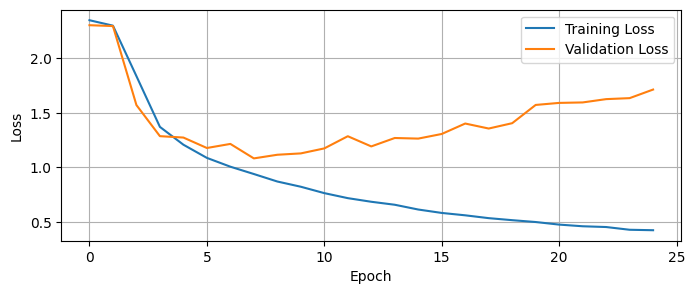

In [35]:
# plot training vs validation loss
plt.figure(figsize=(8,3))
# plt.subplots(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

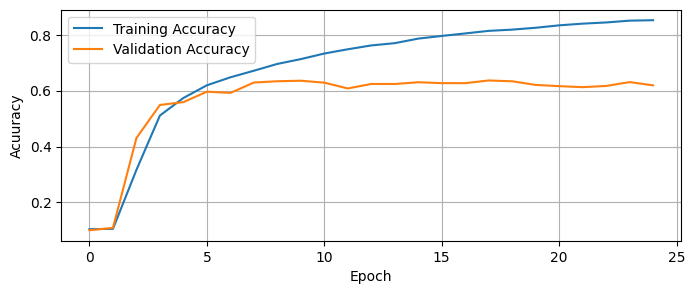

In [36]:
# plot training vs validation Accuracy
plt.figure(figsize=(8,3))
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Acuuracy")
plt.legend()
plt.grid(True)

**Model is overfit**

### **We will Fine-Tune the convolutional base model that we have created using Batch Normalization**

Then add ann layer and compile and train the model

In [36]:
del model

In [38]:
model = models.Sequential() # model object --> created as a placeholder

"""
CNN BASE MODEL WITH BATCH NORMALIZATION
normalize the output of the convolution layer thus add it after convolutional layer
"""
### FIRST CONVOLUTION + POOLING LAYER
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2,2)))

### SECOND CONVOLUTION + POOLING LAYER
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
"""
Inserting a batch normalization layer here
"""
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))

### THIRD CONVOLUTION (JUST FILTERING)
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
"""
Inserting a batch normalization layer here
"""
model.add(layers.BatchNormalization())


"""
ANN Layer
"""
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,082 (480.79 KB)

 Trainable params: 122,826 (479.79 KB)

 Non-trainable params: 256 (1.00 KB)

In [40]:
### Compile and train the model
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ['accuracy'])

In [41]:
history2 = model.fit(train_images, train_labels, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 47ms/step - accuracy: 0.4331 - loss: 1.6261 - val_accuracy: 0.5017 - val_loss: 1.4723
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.6428 - loss: 1.0158 - val_accuracy: 0.5865 - val_loss: 1.2203
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.7021 - loss: 0.8482 - val_accuracy: 0.5688 - val_loss: 1.4264
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.7440 - loss: 0.7262 - val_accuracy: 0.6505 - val_loss: 1.0435
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.7705 - loss: 0.6484 - val_accuracy: 0.6406 - val_loss: 1.0785
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.7977 - loss: 0.5624 - val_accuracy: 0.6285 - val_loss: 1.1508
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.8195 - loss: 0.5081 - val_accuracy: 0.7104 - val_loss: 0.9019
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.8395 -

### Capturing the performance of the `base` CNN model:

- epochs             : `25`
- training accuracy  : `86.52%`
- validation accuracy   : `61.90%`


**Conclusion: Model seems to be  `highly overfit`**

### Capturing the performance of the `base + batch normalization` CNN model:

- epochs             : `25`
- training accuracy  : `95.77 %`
- validation accuracy   : `69.67%`

**Conclusion: Model seems to be  still `highly overfit` however `batch-normalization did help with improving training accuracy**


### Let us add `regularisation` and `dropout` layers

In [42]:
del model

In [43]:
from tensorflow.keras.regularizers import l2

In [44]:
model = models.Sequential()

### Convolutional Layer
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32, 3)))
### Batch Normalization Layer
model.add(layers.BatchNormalization())
### Max Pooling Layer
model.add(layers.MaxPool2D((2,2)))
"""
Dropout Layer
"""
model.add(layers.Dropout(0.25))
"""
Convolutional layer with regularization
"""
model.add(layers.Conv2D(64, (3,3), activation = 'relu', kernel_regularizer = l2(0.01)))

### Batch Normalization Layer
model.add(layers.BatchNormalization())
### Max Pooling Layer
model.add(layers.MaxPool2D((2,2)))
"""
Dropout Layer
"""
model.add(layers.Dropout(0.25))
### Convolutional layer
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))


In [45]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,704 (221.50 KB)

 Trainable params: 56,512 (220.75 KB)

 Non-trainable params: 192 (768.00 B)

In [46]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

In [47]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ['accuracy'])

In [48]:
history3 = model.fit(train_images, train_labels, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 64ms/step - accuracy: 0.3973 - loss: 1.9216 - val_accuracy: 0.5594 - val_loss: 1.3846
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 0.5889 - loss: 1.2526 - val_accuracy: 0.4786 - val_loss: 1.6478
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 65ms/step - accuracy: 0.6502 - loss: 1.0857 - val_accuracy: 0.6027 - val_loss: 1.2599
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 64ms/step - accuracy: 0.6776 - loss: 1.0115 - val_accuracy: 0.5722 - val_loss: 1.4978
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 64ms/step - accuracy: 0.6970 - loss: 0.9602 - val_accuracy: 0.6778 - val_loss: 1.0153
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.7118 - loss: 0.9120 - val_accuracy: 0.6844 - val_loss: 1.0133
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 65ms/step - accuracy: 0.7195 - loss: 0.8841 - val_accuracy: 0.7024 - val_loss: 0.9633
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0

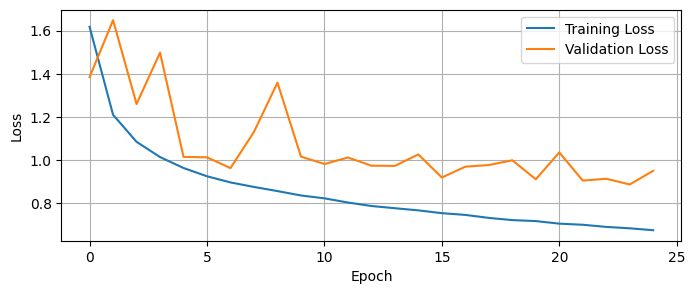

In [49]:
#plot
plt.figure(figsize=(8,3))
# plt.subplots(1,2,1)
plt.plot(history3.history['loss'],label='Training Loss')
plt.plot(history3.history['val_loss'],label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

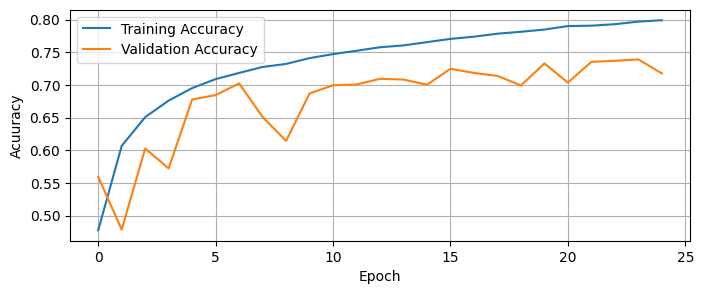

In [50]:
plt.figure(figsize=(8,3))
plt.plot(history3.history['accuracy'],label='Training Accuracy')
plt.plot(history3.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Acuuracy")
plt.legend()
plt.grid(True)

### Capturing the performance of the `base + batch normalization` CNN model:

- epochs             : `25`
- training accuracy  : `80 %`
- validation accuracy   : `72%`

**Conclusion: Model seems to be really stable and overfit has been addressed however with more fine-tuning and increasing epochs would improve the overall accuracy**